ปอดอักเสบ เป็นโรคที่พบได้ประมาณร้อยละ 8-10 ของผู้ป่วยที่มีการติดเชื้อเฉียบพลันระบบหายใจ นับเป็นสาเหตุการตายอันดับหนึ่งของโรคติดเชื้อในเด็กอายุต่ำกว่า 5 ปี เกิดจากสาเหตุหลัก 2 กลุ่ม คือ ปอดอักเสบที่เกิดจากการติดเชื้อและปอดอักเสบที่ไม่ได้เกิดจากการติดเชื้อ ถ้าเราสามารถพัฒนาระบบ AI ช่วยวินิจฉัยโรคเบื้องต้น จำแนกชนิดของโรค จะมีประโยชน์ในการวินิจฉัย และดูแลรักษาตั้งแต่แรก 

# Pneumonia คืออะไร

ปอดอักเสบจากการติดเชื้อ หรือ pneumonia (ปอดบวม)  เป็นโรคที่เกิดจากการอักเสบของเนื้อปอดบริเวณหลอดลมฝอยส่วนปลาย (terminal และ respiratory bronchiole) ถุงลม (alveoli) และเนื้อเยื่อรอบถุงลม (interstitium เป็นชนิดของปอดอักเสบที่พบได้บ่อยที่สุด โดยเชื้อโรคที่เข้าสู่ปอดและทำให้เกิดการอักเสบของถุงลมปอดและเนื้อเยื่อโดยรอบ ได้แก่ เชื้อไวรัส เชื้อแบคทีเรีย และเชื้อรา 

ซึ่งเชื้อที่พบจะแตกต่างกันในแต่ละกลุ่มอายุ และสภาพแวดล้อมที่เกิดโรค เป็นโรคที่พบได้ประมาณร้อยละ 8-10 ของผู้ป่วยที่มีการติดเชื้อเฉียบพลันระบบหายใจ นับเป็นสาเหตุการตายอันดับหนึ่งของโรคติดเชื้อในเด็กอายุต่ำกว่า 5 ปี เช่น ได้รับเชื้อจากที่ชุมชนทั่วไป หรือจากภายในโรงพยาบาล 

ทั้งนี้ เชื้อแบคทีเรียที่พบมักได้แก่ เชื้อ Streptococcus pneumoniae, เชื้อ Haemophilus influenzae type b, เชื้อ Chlamydia pneumoniae, เชื้อ Legionella spp. และเชื้อ Mycoplasma pneumoniae ส่วนเชื้อไวรัส ได้แก่ เชื้อ Respiratory Syncytial Virus (RSV), เชื้อ Influenza หรือเชื้อไข้หวัดใหญ่ และเชื้อราจากมูลนกหรือซากพืชซากสัตว์


เช็ค GPU

In [ ]:
! nvidia-smi

Thu Jul  2 05:12:45 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 0. Magic Command

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# 1. Install Library

Install Library ที่จำเป็น ในที่นี้เราจะใช้ [fastai2](https://www.bualabs.com/archives/4102/tutorial-fastai2-oxford-pets-dog-cat-37-class-machine-learning-deep-neural-networks-image-classification-ep-7/) 

In [ ]:
# ## Colab
# ! pip install fastai2 kornia -q

# 2. Import Library

Import Library ที่จำเป็น รวมถึง sklearn ในการคำนวน [Metrics](https://www.bualabs.com/archives/1968/what-is-confusion-matrix-what-is-metrics-accuracy-precision-recall-f1-score-difference-metrics-ep-1/)

In [ ]:
import gc

from fastai2.basics import *
from fastai2.callback.all import *
from fastai2.metrics import *
from fastai2.vision.all import *

import kornia

import pandas as pd
from sklearn.metrics import *

กำหนด Random Seed จะได้ Reproduce ได้ค่าเดิมทุกครั้งที่รัน

In [ ]:
seed=123456
set_seed(seed)

# 3. Dataset

ในเคสนี้เราจะใช้ Dataset ฟิล์ม Chest X-Ray Images (Pneumonia) จาก Kaggle 

เราจะ Mount Drive ไปยัง Google Drive ที่เก็บ Token File ไว้

In [ ]:
dataset = 'paultimothymooney/chest-xray-pneumonia'

# Google Colab
config_path = Path('/content/drive')
learner_path = config_path/"My Drive"
data_path_base = Path('/content/datasets/')

path = data_path_base/dataset

from google.colab import drive

drive.mount(str(config_path))
os.environ['KAGGLE_CONFIG_DIR'] = f"{config_path}/My Drive/.kaggle"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*ในการจะ Download ข้อมูลจาก Kaggle ต้องใช้ Token ดูวิธีได้ใน ep ก่อน*

In [ ]:
# !kaggle datasets download {dataset} -p "{path}" --unzip

ls ดูว่าได้ Folder อะไรมาบ้าง

In [ ]:
path.ls()

(#1) [Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray')]

In [ ]:
(path/'chest_xray').ls()

(#5) [Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/test'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/chest_xray'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/val'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/__MACOSX')]

ดูข้อมูลใน Training Folder

In [ ]:
(path/'chest_xray/train').ls()

(#2) [Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/NORMAL'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/PNEUMONIA')]

In [ ]:
(path/'chest_xray/train/PNEUMONIA').ls()

(#3875) [Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person479_virus_978.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person420_bacteria_1848.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person82_virus_155.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person848_virus_1493.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person997_bacteria_2926.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person452_bacteria_1943.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person594_virus_1145.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person315_bacteria_1464.jpeg'),Path('/content/datasets/paultimothymoo

In [ ]:
(path/'chest_xray/train/NORMAL').ls()

(#1341) [Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0539-0001-0001.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0487-0001.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0477-0001.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0535-0001.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0364-0001.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0998-0001.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0464-0001.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0605-0001.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0523-0001-0003.jpeg'),Pa

ใช้ฟังก์ชัน `get_image_files` ดึงไฟล์ทั้งหมดมาใส่ List ไว้ก่อน

In [ ]:
items = get_image_files(path/'chest_xray/train')
items

(#5216) [Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0539-0001-0001.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0487-0001.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0477-0001.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0535-0001.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0364-0001.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0998-0001.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0464-0001.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0605-0001.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0523-0001-0003.jpeg'),Pa

# 4. Data

## 4.1 Image

ดูรูปภาพ

In [ ]:
patient = 55

เคสนี้ไฟล์ถูกแปลงเป็น jpg แล้ว ไม่ใช่ [DICOM](https://www.bualabs.com/archives/4284/what-is-dicom-mri-x-ray-ct-scan-ultrasound-medical-diagnosis-pneumothorax-xray-dicom-image-classification-ep-9/)

In [ ]:
items[patient]

Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0500-0001.jpeg')

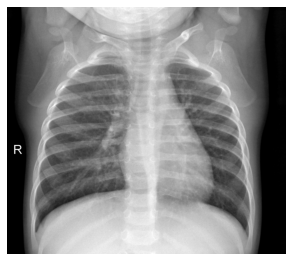

In [ ]:
item = PILImage.create(items[patient])
item.show()

Metadata เป็นรูปสี RGB 3 Channel แบบสี่เหลี่ยมผืนผ้า

In [ ]:
str(item)

'PILImage mode=RGB size=1400x1239'

Label อยู่ในชื่อ Parent Folder

In [ ]:
parent_label(items[patient])

'NORMAL'

# 5. Data Pipeline

## 5.1 Exploratory Data Analysis (EDA)

สำรวจข้อมูล [Exploratory Data Analysis](https://www.bualabs.com/archives/2297/exploratory-data-analysis-eda-pandas-profiling-pandas-dataframe-pandas-ep-6/) จะเห็นว่า มี Class Imbalance แตกต่างกันในแต่ละ Set ประมาณ 1 ต่อ 3, 1 ต่อ 1 และ 1 ต่อ 1.7

In [ ]:
trn0 = get_image_files(path/'chest_xray/train/NORMAL')
trn1 = get_image_files(path/'chest_xray/train/PNEUMONIA')

val0 = get_image_files(path/'chest_xray/val/NORMAL')
val1 = get_image_files(path/'chest_xray/val/PNEUMONIA')

tst0 = get_image_files(path/'chest_xray/test/NORMAL')
tst1 = get_image_files(path/'chest_xray/test/PNEUMONIA')

trn0, trn1, val0, val1, tst0, tst1

((#1341) [Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0539-0001-0001.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0487-0001.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0477-0001.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0535-0001.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0364-0001.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0998-0001.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0464-0001.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0605-0001.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0523-0001-0003.jpeg'),P

เนื่องจากใน val Folder มีแค่ class ละ 8 ไฟล์ เราจะรวม train กับ val Folder เข้าด้วยกัน แล้ว [Split](https://www.bualabs.com/archives/532/what-is-training-set-why-train-test-split-training-set-validation-set-test-set/) เอง 80/20

## 5.2 DataBlock

สร้าง [DataBlock](https://www.bualabs.com/archives/2693/what-is-data-pipeline-data-block-api-data-pipeline-machine-learning-supervised-learning-preprocessing-ep-5/) และ [DataLoader](https://www.bualabs.com/archives/1994/dataset-dataloader-feed-data-x-y-batch-to-neural-network-refactor-training-loop-neural-network-ep-5/) โดยทำ [Data Augmentation](https://www.bualabs.com/archives/1170/what-is-data-augmentation-benefits-data-augmentaion-deep-learning-training-model-deep-neural-network-regularization-ep-1/) ตาม Default 

ใช้ [Data Echoing](https://www.bualabs.com/archives/4157/data-echoing-faster-neural-network-training-with-data-echoing-machine-learning-data-echoing-preprocessing-ep-6/) เพิ่มความเร็วในการเทรน

In [ ]:
class EchoingTransform(ItemTransform):
    order = 2
    split_idx = 0
    def __init__(self, e): self.e = e
    def encodes(self, x):
        img, lbl = x
        # print(img.shape)
        # print(lbl.shape)
        if self.e > 1:
            img = img.repeat(self.e, 1, 1, 1)
            lbl = lbl.repeat(self.e)
        return img, lbl

สร้าง DataBlock โดยใช้ Partial กำหนดให้ใช้ข้อมูลจาก Folder train และ val

In [ ]:
def getDataLoaders(bs, size, e):
    pneumonia = DataBlock(blocks=(ImageBlock(), CategoryBlock), 
                         get_items=partial(get_image_files, folders=['train', 'val']), 
                         get_y=parent_label, 
                         splitter=RandomSplitter(), 
                         item_tfms=RandomResizedCrop(size, min_scale=0.8), 
                         batch_tfms=[EchoingTransform(e), *aug_transforms()]
                         )
    # pneumotpneumoniahorax.summary(path/'chest_xray')
    dls = pneumonia.dataloaders(path/'chest_xray', bs=bs)
    return dls    

สร้าง [DataLoader](https://www.bualabs.com/archives/1994/dataset-dataloader-feed-data-x-y-batch-to-neural-network-refactor-training-loop-neural-network-ep-5/) ด้วย size 224 และ [Batch Size](https://www.bualabs.com/archives/729/what-is-batch-size-in-deep-neural-networks-how-to-adjust-machine-learning-model-accuracy-deep-learning-hyperparameter-tuning-ep-2/) 64 แล้วแสดงข้อมูลตัวอย่าง ใน Batch 

In [ ]:
bs, size, e = 64, 224, 3

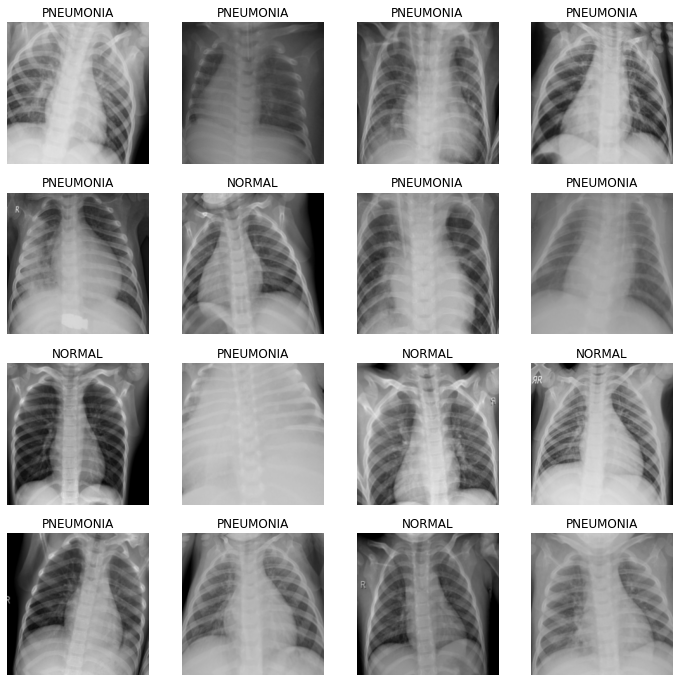

In [ ]:
dls = getDataLoaders(bs, size, e)
dls.show_batch(max_n=16)

เช็คว่ามี 2 Class

In [ ]:
dls.vocab

(#2) ['NORMAL','PNEUMONIA']

# 6. Model

กำหนด [Loss Function](https://www.bualabs.com/archives/2673/what-is-loss-function-cost-function-error-function-loss-function-how-cost-function-work-machine-learning-ep-1/)

In [ ]:
class XFocalLoss(kornia.losses.FocalLoss):
    y_int = True
    def __init__(self, alpha: float, gamma: float = 2.0,
                 reduction: str = 'none') -> None:
        super(XFocalLoss, self).__init__(alpha, gamma, reduction)

    def forward(  # type: ignore
            self,
            input: torch.Tensor,
            target: torch.Tensor) -> torch.Tensor:       

        # set_trace()
        # print(input.shape)
        # print(target.shape)
        return super().forward(input, target)      

    def decodes(self, x):    return x.argmax(dim=1)
    def activation(self, x): return F.softmax(x, dim=1)               

เนื่องจาก Class Imbalance เราจะใช้ [Weighted Cross Entropy Loss](https://www.bualabs.com/archives/4351/what-is-weighted-cross-entropy-loss-loss-function-ep-5/) โดยให้น้ำหนักกับ Normal มากกว่า Pneumonia

In [ ]:
weights = torch.tensor([[1.8]*1 + [0.4]]).cuda()
loss_func = CrossEntropyLossFlat(weight=weights)

# loss_func = CrossEntropyLossFlat()

# loss_func = XFocalLoss(alpha=1.0, gamma=2.0, reduction='mean')

ใช้ [Convolutional Neural Network](https://www.bualabs.com/archives/2703/how-to-read-model-convolutional-neural-network-shape-activation-map-model-architecture-convnet-ep-7/) สถาปัตยกรรม [ResNet34](https://www.bualabs.com/archives/482/resnet34-vs-resnet50-deep-learning-pets-cats-dogs-image-classification-with-fastai-v1-ep-2/) เวอร์ชันพิเศษของ fastai ชื่อว่า xresnet

In [ ]:
arch = xresnet34(pretrained=False, c_in=3, act_cls=Mish, sa=True, n_out=2)

ดู Activation Function เป็น [Mish](https://www.bualabs.com/archives/4239/mish-activation-function-neural-networks-next-relu-activation-function-ep-4/) แทนที่จะเป็น [ReLU](https://www.bualabs.com/archives/1355/what-is-relu-function-why-popular-deep-learning-training-deep-neural-network-activation-function-ep-3/) ตามปกติ

In [ ]:
arch[0]

ConvLayer(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Mish()
)

สร้าง Learner จาก [Architecture](https://www.bualabs.com/archives/2703/how-to-read-model-convolutional-neural-network-shape-activation-map-model-architecture-convnet-ep-7/) ด้านบน โดยมี [Metrics](https://www.bualabs.com/archives/2075/validation-metrics-neural-network-validation-set-train-machine-learning-neural-network-ep-8/) เช่น [Accuracy, F1 Score และ Recall](https://www.bualabs.com/archives/1968/what-is-confusion-matrix-what-is-metrics-accuracy-precision-recall-f1-score-difference-metrics-ep-1/)

In [ ]:
# learn = cnn_learner(dls, arch=arch, metrics=accuracy, 
#                     loss_func=loss_func, opt_func=ranger, 
#                     cbs=[ShowGraphCallback])

learn = Learner(dls, arch, loss_func=loss_func, opt_func=ranger, 
                cbs=[ShowGraphCallback], path=learner_path, 
                metrics=[accuracy, F1Score(axis=1), Recall(axis=1)])

# 7. Train

## 7.1 Fine-tune

เริ่มต้นเทรนตั้งแต่ต้น From Scratch ทั้งโมเดล ด้วย fit_flat_cos เนื่องจากเราใช้ [Mish Activation Function](https://www.bualabs.com/archives/4239/mish-activation-function-neural-networks-next-relu-activation-function-ep-4/)

In [ ]:
# learn.lr_find()

epoch,train_loss,valid_loss,accuracy,f1_score,recall_score,time
0,0.332867,0.227894,0.860421,0.896307,0.820546,01:28


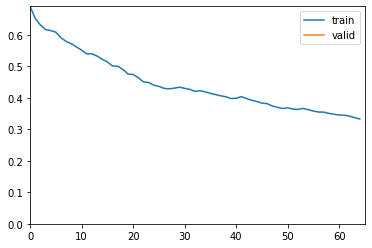

In [ ]:
learn.fit_flat_cos(1, lr=slice(1e-4, 1e-2))

epoch,train_loss,valid_loss,accuracy,f1_score,recall_score,time
0,0.206964,0.164379,0.929254,0.950202,0.918075,01:27
1,0.178807,0.222340,0.821224,0.861789,0.758127,01:27
2,0.173067,0.404759,0.880497,0.918354,0.914174,01:27
3,0.160013,0.227520,0.960803,0.973968,0.997399,01:27
4,0.142340,0.100097,0.976099,0.983756,0.984395,01:27
5,0.141687,0.099382,0.965583,0.976409,0.968791,01:27
6,0.142873,0.141668,0.971319,0.980695,0.990897,01:26
7,0.126443,0.090812,0.978011,0.985094,0.988296,01:27
8,0.112279,0.117793,0.910134,0.934993,0.879064,01:27
9,0.103546,0.083056,0.973231,0.981747,0.979194,01:27


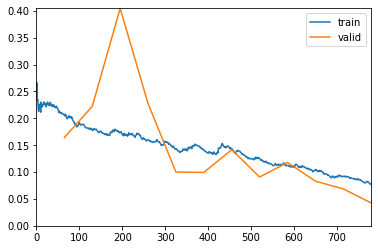

In [ ]:
learn.fit_flat_cos(12, lr=slice(3e-5, 3e-3))

ได้ F1 Score 98.6% เซฟโมเดลไว้ก่อน

In [ ]:
learn.save("01k_224-1")

## 7.2 Progressive Resizing

สร้าง Data Loader ใหม่ ด้วย size รูปที่ใหญ่ขึ้น เป็นขนาด 384 x 384 Pixel และ ลดขนาด [Batch Size](https://www.bualabs.com/archives/729/what-is-batch-size-in-deep-neural-networks-how-to-adjust-machine-learning-model-accuracy-deep-learning-hyperparameter-tuning-ep-2/) ลงเป็นเท่ากับ 32 เพื่อไม่ให้ [GPU](https://www.bualabs.com/archives/1426/why-gpu-require-train-deep-learning-compare-cpu-vs-gpu-deep-neural-network-hardware-ep-2/) Memory เต็ม เราสามารถเช็คขนาดได้ด้วยคำสั่ง [nvidia-smi](https://www.bualabs.com/archives/489/nvidia-smi-gpu-monitoring-tools-gpu-utilization-memory-usage-nvidia-hardware-ep-1/)

In [ ]:
learn = None
dls = None
gc.collect()
torch.cuda.empty_cache()

In [ ]:
bs, size, e = 32, 384, 2

In [ ]:
dls = getDataLoaders(bs, size, e)

สร้าง [Learner](https://www.bualabs.com/archives/2318/databunch-learner-refactor-neural-network-training-loop-neural-network-ep-9/) ใหม่จาก [Data Loader](https://www.bualabs.com/archives/1994/dataset-dataloader-feed-data-x-y-batch-to-neural-network-refactor-training-loop-neural-network-ep-5/) ด้านบน

In [ ]:
# learn = cnn_learner(dls, arch=arch, metrics=accuracy, 
#                     loss_func=loss_func, opt_func=ranger, 
#                     cbs=[ShowGraphCallback])

learn = Learner(dls, arch, loss_func=loss_func, opt_func=ranger, 
                cbs=[ShowGraphCallback], path=learner_path, 
                metrics=[accuracy, F1Score(axis=1), Recall(axis=1)])

โหลดโมเดล 224 ขึ้นมา ทำ [Transfer Learning](https://www.bualabs.com/archives/3493/what-is-transfer-learning-build-headless-mobilenet-model-transfer-learning-machine-learning-mobilenet-json-retrain-webcam-tensorflow-js-tfjs-ep-10/) เทรนต่อ

In [ ]:
learn.load("01k_224-1")

Freeze โมเดล ยกเว้น Layer Group สุดท้าย

In [ ]:
learn.freeze()

เทรนต่อ

In [ ]:
# learn.lr_find()

epoch,train_loss,valid_loss,accuracy,f1_score,recall_score,time
0,0.132986,0.087022,0.974187,0.982479,0.979301,01:57
1,0.103649,0.103307,0.976099,0.983943,0.990944,01:56
2,0.103144,0.088172,0.979924,0.986460,0.989651,01:56
3,0.090616,0.073929,0.979924,0.986390,0.984476,01:56
4,0.086368,0.091480,0.979924,0.986495,0.992238,01:57
5,0.090080,0.092861,0.978967,0.985861,0.992238,01:59
6,0.083640,0.085897,0.980880,0.987113,0.990944,01:58
7,0.069982,0.080966,0.982792,0.988402,0.992238,01:58


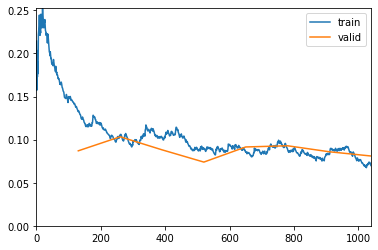

In [ ]:
learn.fit_flat_cos(8, lr=slice(3e-4))

เซฟไว้ก่อน

In [ ]:
learn.save("01k_384-1")

In [ ]:
# learn.load("01k_384-1");

Unfreeze แล้วเทรนต่อทั้งโมเดล

In [ ]:
learn.unfreeze()

In [ ]:
# learn.lr_find()

epoch,train_loss,valid_loss,accuracy,f1_score,recall_score,time
0,0.065826,0.107674,0.979924,0.986495,0.992238,01:57
1,0.079754,0.104948,0.979924,0.986513,0.993532,01:57
2,0.079750,0.088169,0.982792,0.988402,0.992238,01:58
3,0.063506,0.070907,0.985660,0.990316,0.992238,01:59


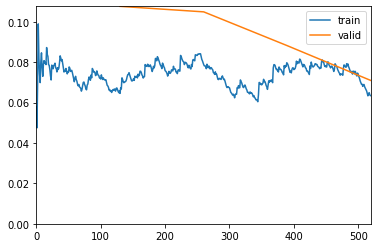

In [ ]:
learn.fit_flat_cos(4, lr=slice(1e-6, 1e-4))

In [ ]:
learn.save("01k_384-2")

In [ ]:
# learn.load("01k_384-2");

## 7.3 Data Augmentation Annealing

ก่อนจบ เราจะเทรนแบบไม่ใช้ [Data Augmentation](https://www.bualabs.com/archives/1170/what-is-data-augmentation-benefits-data-augmentaion-deep-learning-training-model-deep-neural-network-regularization-ep-1/) กันอีกสักหน่อย

In [ ]:
bs, size = 32, 384 

pneumonia = DataBlock(blocks=(ImageBlock(), CategoryBlock), 
                         get_items=partial(get_image_files, folders=['train', 'val']), 
                         get_y=parent_label, 
                         splitter=RandomSplitter(valid_pct=0.05), 
                         item_tfms=Resize(size, method='squish'), 
                         batch_tfms=[]
                         )
# pneumonia.summary(path/'chest_xray')
dls = pneumonia.dataloaders(path/'chest_xray', bs=bs)

สร้าง [Learner](https://www.bualabs.com/archives/2318/databunch-learner-refactor-neural-network-training-loop-neural-network-ep-9/) ใหม่จาก [Data Loader](https://www.bualabs.com/archives/1994/dataset-dataloader-feed-data-x-y-batch-to-neural-network-refactor-training-loop-neural-network-ep-5/) ด้านบน

In [ ]:
# learn = cnn_learner(dls, arch=arch, metrics=accuracy, 
#                     loss_func=loss_func, opt_func=ranger, 
#                     cbs=[ShowGraphCallback])

learn = Learner(dls, arch, loss_func=loss_func, opt_func=ranger, 
                cbs=[ShowGraphCallback], path=learner_path, 
                metrics=[accuracy, F1Score(axis=1), Recall(axis=1)])

โหลดโมเดลด้านบนขึ้นมา

In [ ]:
learn.load("01k_384-2");
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,f1_score,recall_score,time
0,0.050885,0.056079,0.977012,0.985075,0.970588,01:48


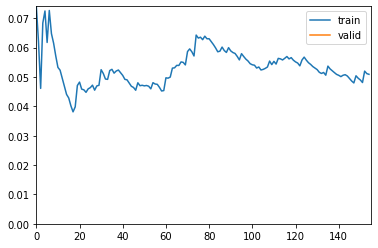

In [ ]:
learn.fit_flat_cos(1, lr=slice(3e-7, 3e-5))

ได้ Accuracy 97.7%, F1 Score 98.5% และ Recall 97.0%

In [ ]:
learn.save("01k_384-3")

In [ ]:
# learn.load("01k_384-3");

แสดงผลลัพธ์การทำงาน

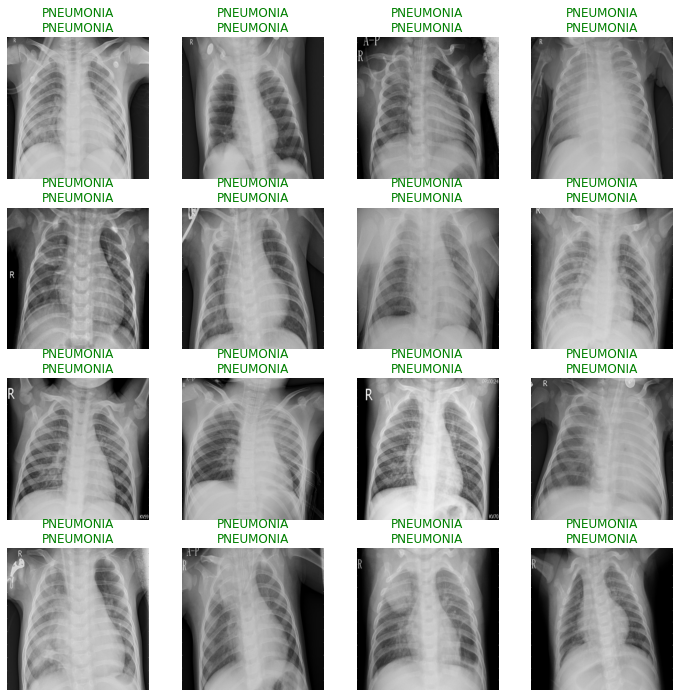

In [ ]:
learn.show_results(max_n=16)

# 8. ตีความผลลัพธ์

เราจะใช้ คลาส ClassificationInterpretation ในการช่วยตีความผลการทำงานของโมเดล

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

พล็อต [Confusion Matrix](https://www.bualabs.com/archives/1968/what-is-confusion-matrix-what-is-metrics-accuracy-precision-recall-f1-score-difference-metrics-ep-1/)

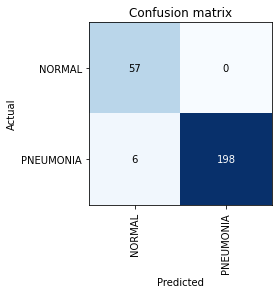

In [ ]:
interp.plot_confusion_matrix()

แสดงสถิติที่เกี่ยวข้อง เช่น Precision, Recall

In [ ]:
interp.print_classification_report()

              precision    recall  f1-score   support

      NORMAL       0.90      1.00      0.95        57
   PNEUMONIA       1.00      0.97      0.99       204

    accuracy                           0.98       261
   macro avg       0.95      0.99      0.97       261
weighted avg       0.98      0.98      0.98       261



แสดงรายการที่โมเดลทายผิดมากที่สุด

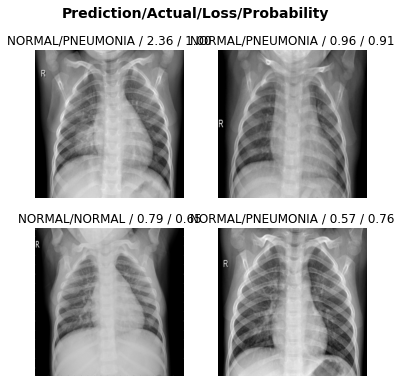

In [ ]:
interp.plot_top_losses(4)

# 9. Test Set

ใน Dataset นี้ นอกจาก [Training Set, Validation Set](https://www.bualabs.com/archives/532/what-is-training-set-why-train-test-split-training-set-validation-set-test-set/) แล้ว ยังมีเตรียม Test Set ไว้ให้เราด้วย เราจะใช้ข้อมูลที่แยกไว้ ใน Test Set นี้เป็นตัวทดสอบ เสมือนว่าเป็นข้อมูลจากโลกความเป็นจริง Real-world

เอารายการไฟล์ทั้งหมด 624 ไฟล์ มาใส่ List

In [ ]:
tst_fns = get_image_files(path/'chest_xray/test')
tst_fns

(#624) [Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0036-0001.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0093-0001.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0011-0001-0002.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0171-0001.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0345-0001.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0317-0001.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0025-0001.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0195-0001.jpeg'),Path('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0001-0001.jpeg'),P

แยก Label ออกมา จาก Parent Folder

In [ ]:
tst_lbl = [parent_label(fn) for fn in tst_fns]
tst_lbl[:10], tst_lbl[-10:]

(['NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL'],
 ['PNEUMONIA',
  'PNEUMONIA',
  'PNEUMONIA',
  'PNEUMONIA',
  'PNEUMONIA',
  'PNEUMONIA',
  'PNEUMONIA',
  'PNEUMONIA',
  'PNEUMONIA',
  'PNEUMONIA'])

สร้าง DataLoader ใหม่จาก Transform เดิมใน Validation Set ในเคสนี้มี Label มาด้วย

In [ ]:
dl = learn.dls.test_dl(tst_fns, with_labels=True)
# dl = learn.valid_dl.new()

ลองดูข้อมูล

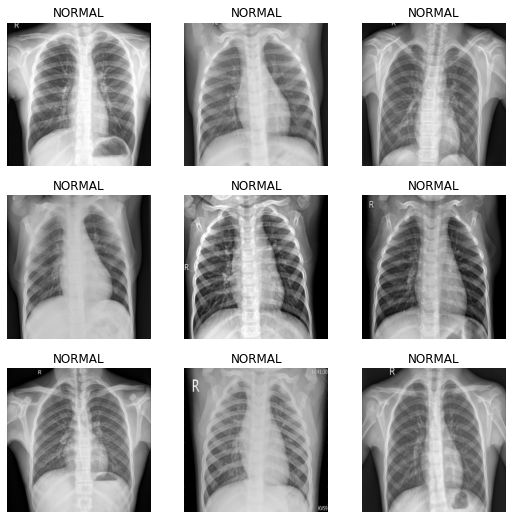

In [ ]:
dl.show_batch()

ใช้ Model ทำ Inference

In [ ]:
preds, _ = learn.get_preds(dl=dl)

In [ ]:
preds.shape

torch.Size([624, 2])

แปลง Label เป็น 0, 1 เพื่อใช้เปรียบเทียบ

In [ ]:
tst_lbl_num = [0 if lbl == 'NORMAL' else 1 for lbl in tst_lbl]
tst_lbl_num[:10], tst_lbl_num[-10:]

([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

ใช้ Argmax แปลง ความน่าจะเป็นของแต่ละ class ให้เป็น 0, 1

In [ ]:
preds_num = preds.argmax(1)
preds_num[:10], preds_num[-10:]

(tensor([0, 0, 0, 0, 0, 0, 0, 1, 0, 0]),
 tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

เช็คค่า Metrics ต่าง ๆ

In [ ]:
accuracy_score(tst_lbl_num, preds_num)

0.9278846153846154

In [ ]:
precision_score(tst_lbl_num, preds_num)

0.8983833718244804

In [ ]:
f1_score(tst_lbl_num, preds_num)

0.9453219927095989

In [ ]:
recall_score(tst_lbl_num, preds_num)

0.9974358974358974

สำหรับ Test Set ได้ Accuracy เท่ากับ 92.7%, F1 Score เท่ากับ 94.5% และ Recall เท่ากับ 99.7% 

# Credit

* https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia
* https://www.bualabs.com/archives/4284/what-is-dicom-mri-x-ray-ct-scan-ultrasound-medical-diagnosis-pneumothorax-xray-dicom-image-classification-ep-9/
* https://www.bualabs.com/archives/4122/ai-diagnose-melanoma-skin-cancer-mnist-ham10000-dermatoscopic-pigmented-lesions-image-classification-ep-8/
* http://www.boe.moph.go.th/fact/Pneumonia.htm
* http://www.thaipediatrics.org/Media/media-20190909125937.pdf
* https://www.bumrungrad.com/th/conditions/pneumonitis